In [3]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
from shapely.geometry import Point
plt.style.use('ggplot')
%matplotlib inline

In [4]:
df = pd.read_json("climbing-data/openbeta-usa-routes-aug-2020.zip", lines = True, compression= "zip")

In [5]:
#looking at the head of the data
df.head()

route_name  \
0             Wheres Waldo?   
1                   Unknown   
2            Vanished Edens   
3        Stairway to Heaven   
4  Shagadelic Humper Bumper   

                                               grade safety  \
0                        {'YDS': 'V2', 'Font': '5+'}          
1                                                 {}          
2                        {'YDS': 'V4', 'Font': '6B'}          
3  {'YDS': '5.7', 'French': '5a', 'Ewbanks': '15'...          
4  {'YDS': '5.8', 'French': '5b', 'Ewbanks': '16'...          

                         type                 fa  \
0           {'boulder': True}            unknown   
1   {'tr': True, 'ice': True}             Unkown   
2           {'boulder': True}  Joe Feldman, 2019   
3  {'trad': True, 'tr': True}            unknown   
4                {'tr': True}            unknown   

                                         description  \
0  [Sit Start on the crack. Pull a big move to a ...   
1  [Just a general entry for the routes. Usually ...   
2  [Start right hand in a sidepull slot and left ...   
3  [Climb the large flake right of Slot Machine t...   
4            [Climb the buttress left of Cake Walk.]   

                                            location  \
0                                                      
1  [Can't miss the silo with a giant sheet of ice...   
2                              [Hot Stuff Camp Roof]   
3                                                      
4                                                      

                                       protection  \
0                                          [Pads]   
1  [No gear needed. All supplied and is Top Rope]   
2                            [pad - good landing]   
3                        [SR, tricams are handy.]   
4      [Build a TR anchor on off of trees above.]   

                                            metadata  
0  {'left_right_seq': '999999', 'parent_lnglat': ...  
1  {'left_right_seq': '0', 'parent_lnglat': [-92....  
2  {'left_right_seq': '1', 'parent_lnglat': [-91....  
3  {'left_right_seq': '5', 'parent_lnglat': [-91....  
4  {'left_right_seq': '999999', 'parent_lnglat': ...

In [6]:
#checking the length
len(df)

183253

In [7]:
#looking at the metadata
df.iloc[0]["metadata"]

{'left_right_seq': '999999',
 'parent_lnglat': [-91.54207, 42.02717],
 'parent_sector': "Waldo's Rock Park",
 'mp_route_id': '118170758',
 'mp_sector_id': '118170033'}

In [8]:
#cleaning the metadata and creating a geometry to use
climbs = df.join(pd.json_normalize(df['metadata']).add_prefix("metadata.")).drop(["metadata"], axis = 1)
geometry = [Point(tuple(xy)) for xy in climbs['metadata.parent_lnglat']]

In [9]:
#creating the geodataframe
geo_df = gpd.GeoDataFrame(climbs, crs="EPSG:4326", geometry=geometry)
#making 'type' easier to work with
geo_df["boulder"] = [x.get("boulder", False) for x in geo_df["type"]]
geo_df["tr"] = [x.get("tr", False) for x in geo_df["type"]]
geo_df["sport"] = [x.get("sport", False) for x in geo_df["type"]]
geo_df["ice"] = [x.get("ice", False) for x in geo_df["type"]]
geo_df["trad"] = [x.get("trad", False) for x in geo_df["type"]]

In [10]:
climbs.head()

route_name  \
0             Wheres Waldo?   
1                   Unknown   
2            Vanished Edens   
3        Stairway to Heaven   
4  Shagadelic Humper Bumper   

                                               grade safety  \
0                        {'YDS': 'V2', 'Font': '5+'}          
1                                                 {}          
2                        {'YDS': 'V4', 'Font': '6B'}          
3  {'YDS': '5.7', 'French': '5a', 'Ewbanks': '15'...          
4  {'YDS': '5.8', 'French': '5b', 'Ewbanks': '16'...          

                         type                 fa  \
0           {'boulder': True}            unknown   
1   {'tr': True, 'ice': True}             Unkown   
2           {'boulder': True}  Joe Feldman, 2019   
3  {'trad': True, 'tr': True}            unknown   
4                {'tr': True}            unknown   

                                         description  \
0  [Sit Start on the crack. Pull a big move to a ...   
1  [Just a general entry for the routes. Usually ...   
2  [Start right hand in a sidepull slot and left ...   
3  [Climb the large flake right of Slot Machine t...   
4            [Climb the buttress left of Cake Walk.]   

                                            location  \
0                                                      
1  [Can't miss the silo with a giant sheet of ice...   
2                              [Hot Stuff Camp Roof]   
3                                                      
4                                                      

                                       protection metadata.left_right_seq  \
0                                          [Pads]                  999999   
1  [No gear needed. All supplied and is Top Rope]                       0   
2                            [pad - good landing]                       1   
3                        [SR, tricams are handy.]                       5   
4      [Build a TR anchor on off of trees above.]                  999999   

  metadata.parent_lnglat    metadata.parent_sector metadata.mp_route_id  \
0  [-91.54207, 42.02717]         Waldo's Rock Park            118170758   
1    [-92.5246, 42.5484]         Silo Ice Climbing            107415908   
2    [-91.5615, 42.6154]       Hot Stuff Camp Roof            117944541   
3     [-91.5625, 42.614]             Drive In Wall            106956280   
4     [-91.5625, 42.614]  Cake Walk and Razor Wall            106956324   

  metadata.mp_sector_id  
0             118170033  
1             107415897  
2             117944427  
3             106947227  
4             106947239

In [11]:
#getting a US map and cleaning out states and islands that are not in the lower 48.
usdf = gpd.read_file("cb_2018_us_state_500k/cb_2018_us_state_500k.shp", crs="EPSG:4326")
usdf = usdf.drop([13,27,37,38,42,44,45])
usdf = usdf.reset_index(drop = True)

<Axes: >

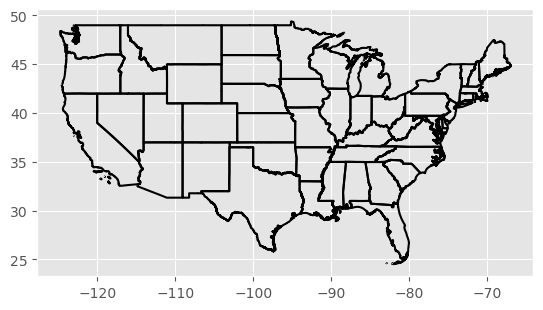

In [12]:
#simple plot of US map
usdf.boundary.plot(edgecolor= "black")

In [13]:
usdf

STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0       28  01779790  0400000US28    28     MS           Mississippi   00   
1       37  01027616  0400000US37    37     NC        North Carolina   00   
2       40  01102857  0400000US40    40     OK              Oklahoma   00   
3       51  01779803  0400000US51    51     VA              Virginia   00   
4       54  01779805  0400000US54    54     WV         West Virginia   00   
5       22  01629543  0400000US22    22     LA             Louisiana   00   
6       26  01779789  0400000US26    26     MI              Michigan   00   
7       25  00606926  0400000US25    25     MA         Massachusetts   00   
8       16  01779783  0400000US16    16     ID                 Idaho   00   
9       12  00294478  0400000US12    12     FL               Florida   00   
10      31  01779792  0400000US31    31     NE              Nebraska   00   
11      53  01779804  0400000US53    53     WA            Washington   00   
12      35  00897535  0400000US35    35     NM            New Mexico   00   
13      46  01785534  0400000US46    46     SD          South Dakota   00   
14      48  01779801  0400000US48    48     TX                 Texas   00   
15      06  01779778  0400000US06    06     CA            California   00   
16      01  01779775  0400000US01    01     AL               Alabama   00   
17      13  01705317  0400000US13    13     GA               Georgia   00   
18      42  01779798  0400000US42    42     PA          Pennsylvania   00   
19      29  01779791  0400000US29    29     MO              Missouri   00   
20      08  01779779  0400000US08    08     CO              Colorado   00   
21      49  01455989  0400000US49    49     UT                  Utah   00   
22      47  01325873  0400000US47    47     TN             Tennessee   00   
23      56  01779807  0400000US56    56     WY               Wyoming   00   
24      36  01779796  0400000US36    36     NY              New York   00   
25      20  00481813  0400000US20    20     KS                Kansas   00   
26      32  01779793  0400000US32    32     NV                Nevada   00   
27      17  01779784  0400000US17    17     IL              Illinois   00   
28      50  01779802  0400000US50    50     VT               Vermont   00   
29      30  00767982  0400000US30    30     MT               Montana   00   
30      19  01779785  0400000US19    19     IA                  Iowa   00   
31      45  01779799  0400000US45    45     SC        South Carolina   00   
32      33  01779794  0400000US33    33     NH         New Hampshire   00   
33      04  01779777  0400000US04    04     AZ               Arizona   00   
34      11  01702382  0400000US11    11     DC  District of Columbia   00   
35      34  01779795  0400000US34    34     NJ            New Jersey   00   
36      24  01714934  0400000US24    24     MD              Maryland   00   
37      23  01779787  0400000US23    23     ME                 Maine   00   
38      10  01779781  0400000US10    10     DE              Delaware   00   
39      44  01219835  0400000US44    44     RI          Rhode Island   00   
40      21  01779786  0400000US21    21     KY              Kentucky   00   
41      39  01085497  0400000US39    39     OH                  Ohio   00   
42      55  01779806  0400000US55    55     WI             Wisconsin   00   
43      41  01155107  0400000US41    41     OR                Oregon   00   
44      38  01779797  0400000US38    38     ND          North Dakota   00   
45      05  00068085  0400000US05    05     AR              Arkansas   00   
46      18  00448508  0400000US18    18     IN               Indiana   00   
47      27  00662849  0400000US27    27     MN             Minnesota   00   
48      09  01779780  0400000US09    09     CT           Connecticut   00   

           ALAND        AWATER  \
0   121533519481    3926919758   
1   125923656064   13466071395   
2   177662925723    3374587997   
3   102257717110

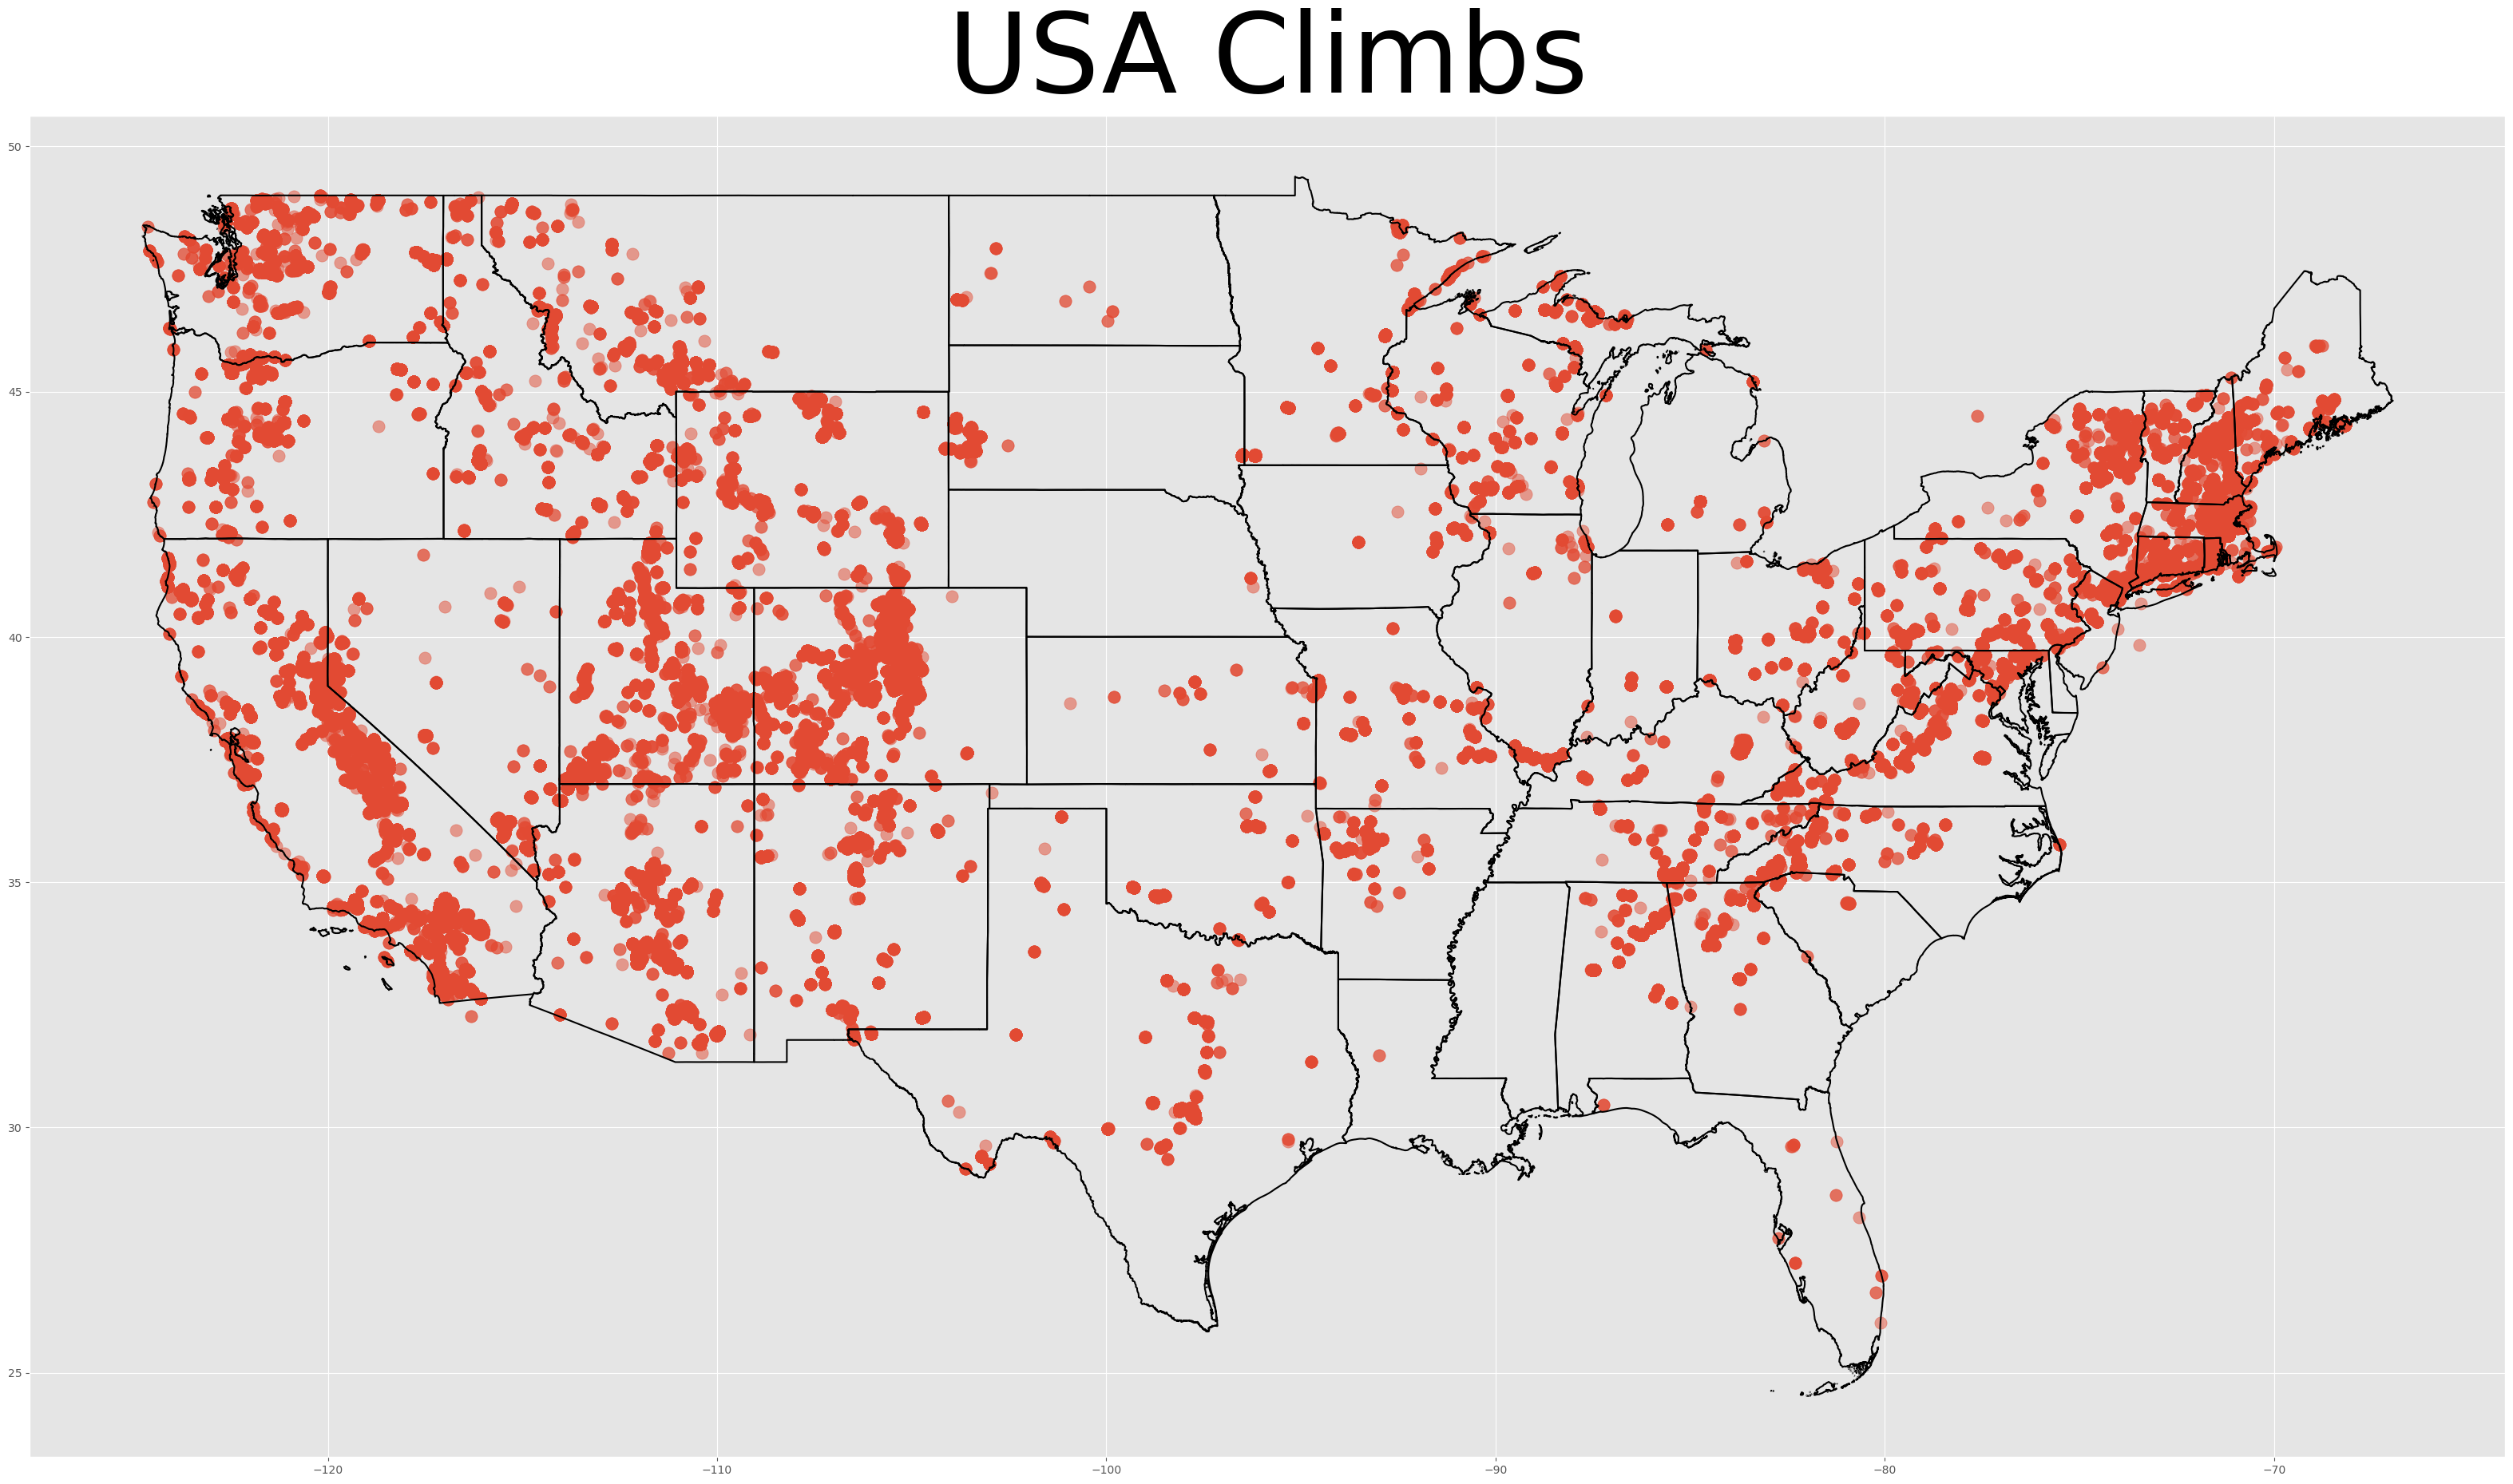

In [14]:
base = usdf.boundary.plot(edgecolor= "black", figsize=(40, 40))
geo_df.plot(ax = base, alpha=0.5,markersize = 120, legend = True)
base.set_title("USA Climbs", fontsize = 100)
plt.show()

# Practice subsetting data and coloring by boolean

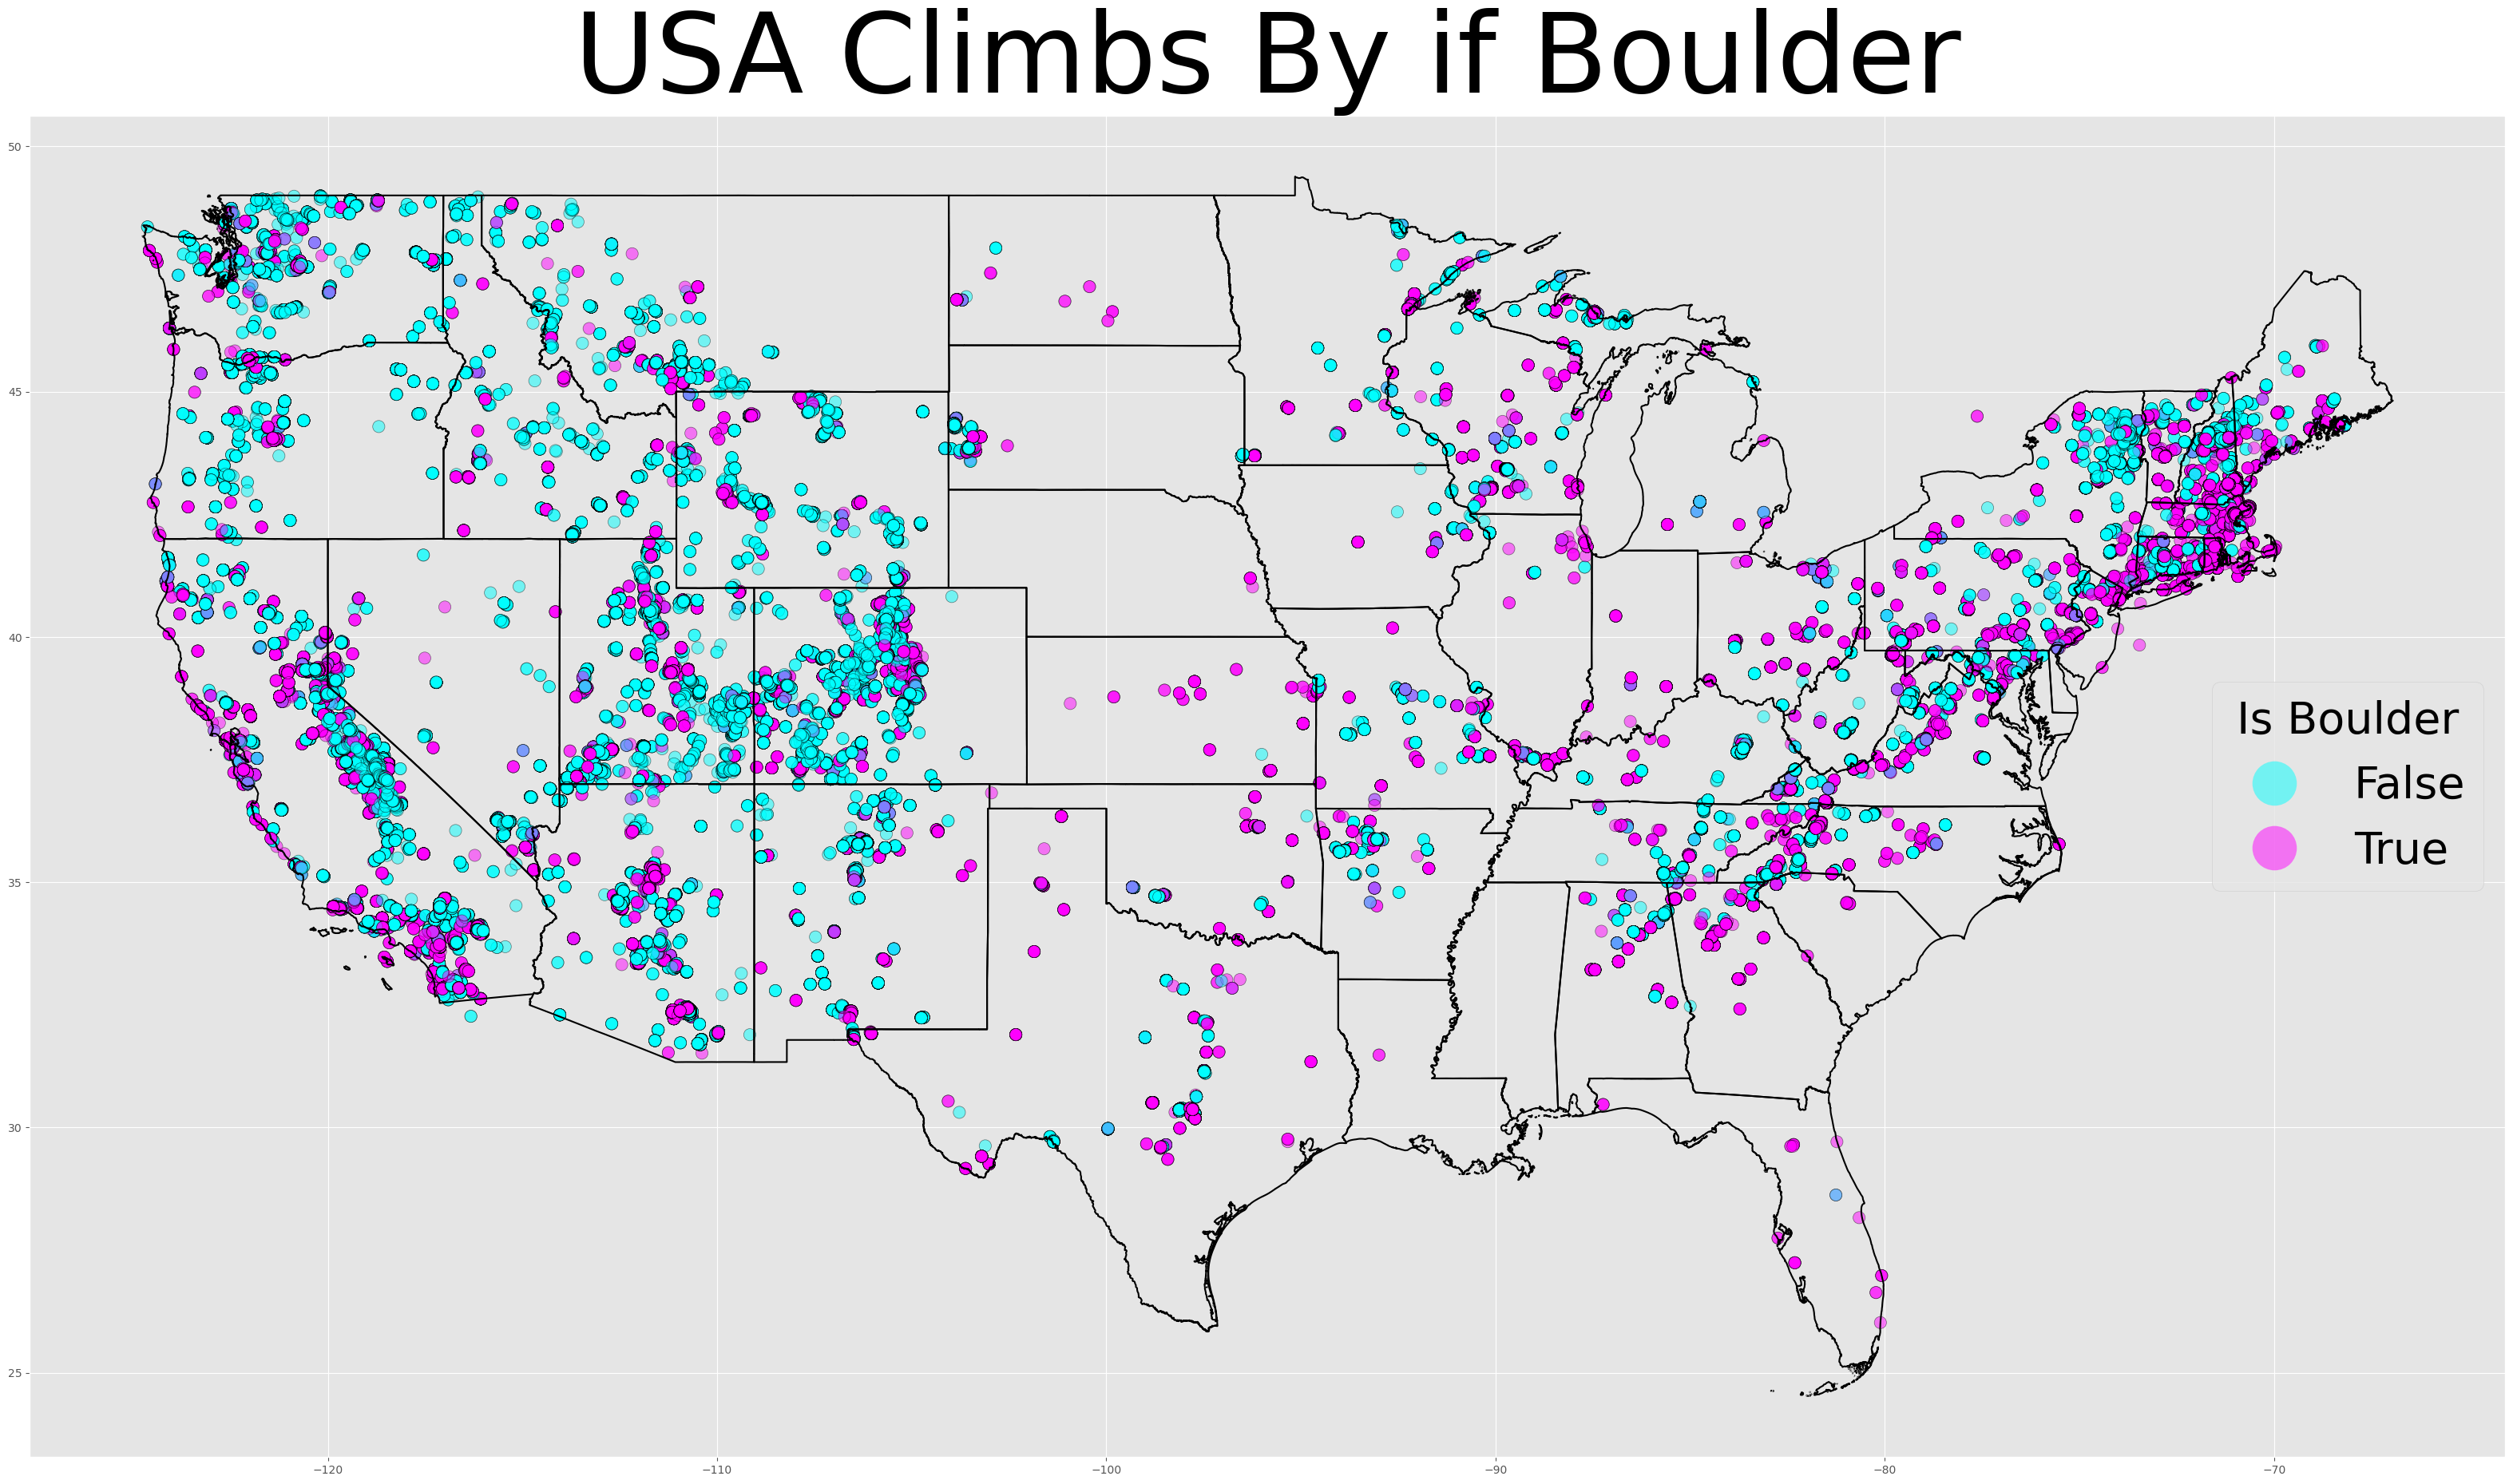

In [15]:
base = usdf.boundary.plot(edgecolor= "black", figsize=(40, 40))
geo_df.plot(ax = base, column = geo_df["boulder"], cmap = "cool", markersize = 120, alpha=0.5, edgecolor='k', legend = True, categorical = True, legend_kwds = {'title': 'Is Boulder','title_fontsize': 40,'loc': "center right", 'bbox_to_anchor':(1,0.5), 'prop':{'size':40}, 'markerscale':4})
base.set_title("USA Climbs By if Boulder", fontsize = 100)
plt.show()

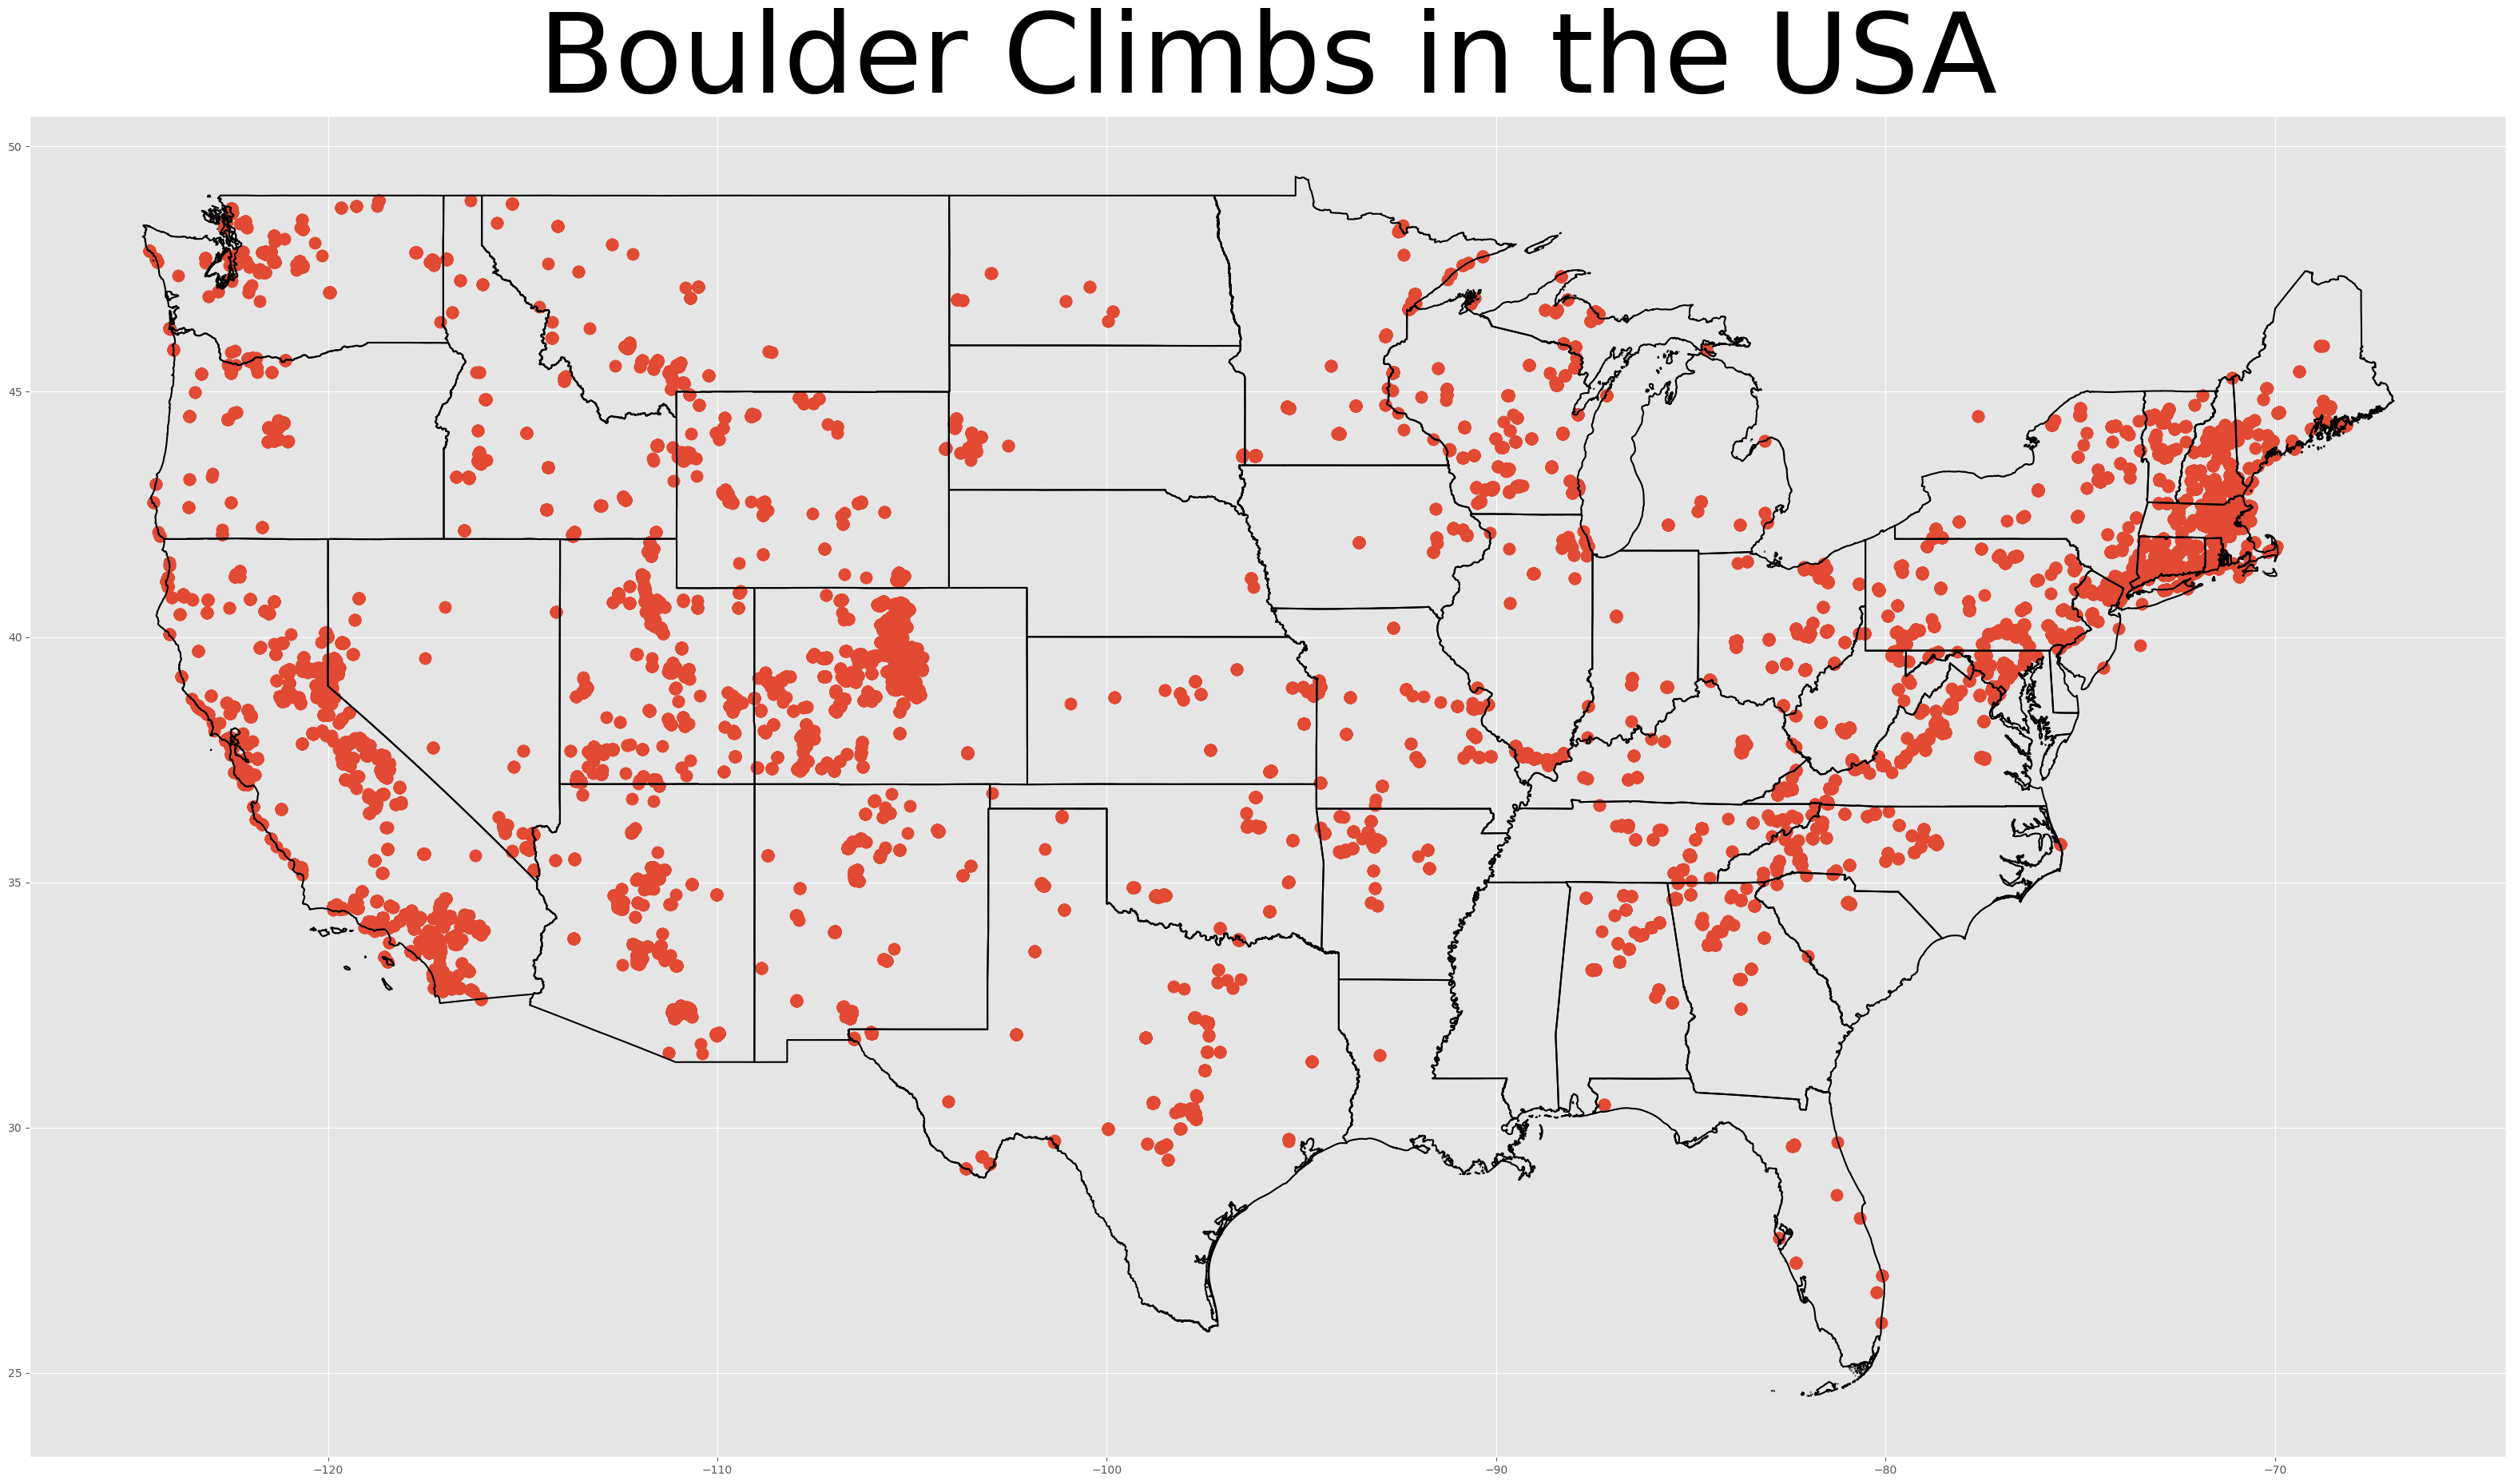

In [16]:
base = usdf.boundary.plot(edgecolor= "black", figsize=(40, 40))
geo_df[geo_df["boulder"] == True].plot(ax = base, markersize = 120)
base.set_title("Boulder Climbs in the USA", fontsize = 100)
plt.show()

# Clean Bouldering Grades into Numerical Values

In [17]:
import re
boulders = geo_df[geo_df["boulder"] == True]

In [18]:
b_grades = [x.get("YDS",None) for x in geo_df[geo_df["boulder"] == True]["grade"]] #only yosemite grades\
only_v = [re.sub('V-easy', 'V0',x) for x in b_grades]
only_v = [x[1:] if x.startswith('V') else None for x in only_v ]
only_v = [None if x is None or x.startswith('?') else x for x in only_v ]
only_v = [re.split('-', x)[0] if x is not None else x for x in only_v]
only_v = [x.replace('+','') if x is not None else x for x in only_v]
only_v = [int(x) if x is not None else x for x in only_v]
boulders["numeric_grades"] = only_v

/home/marcel/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


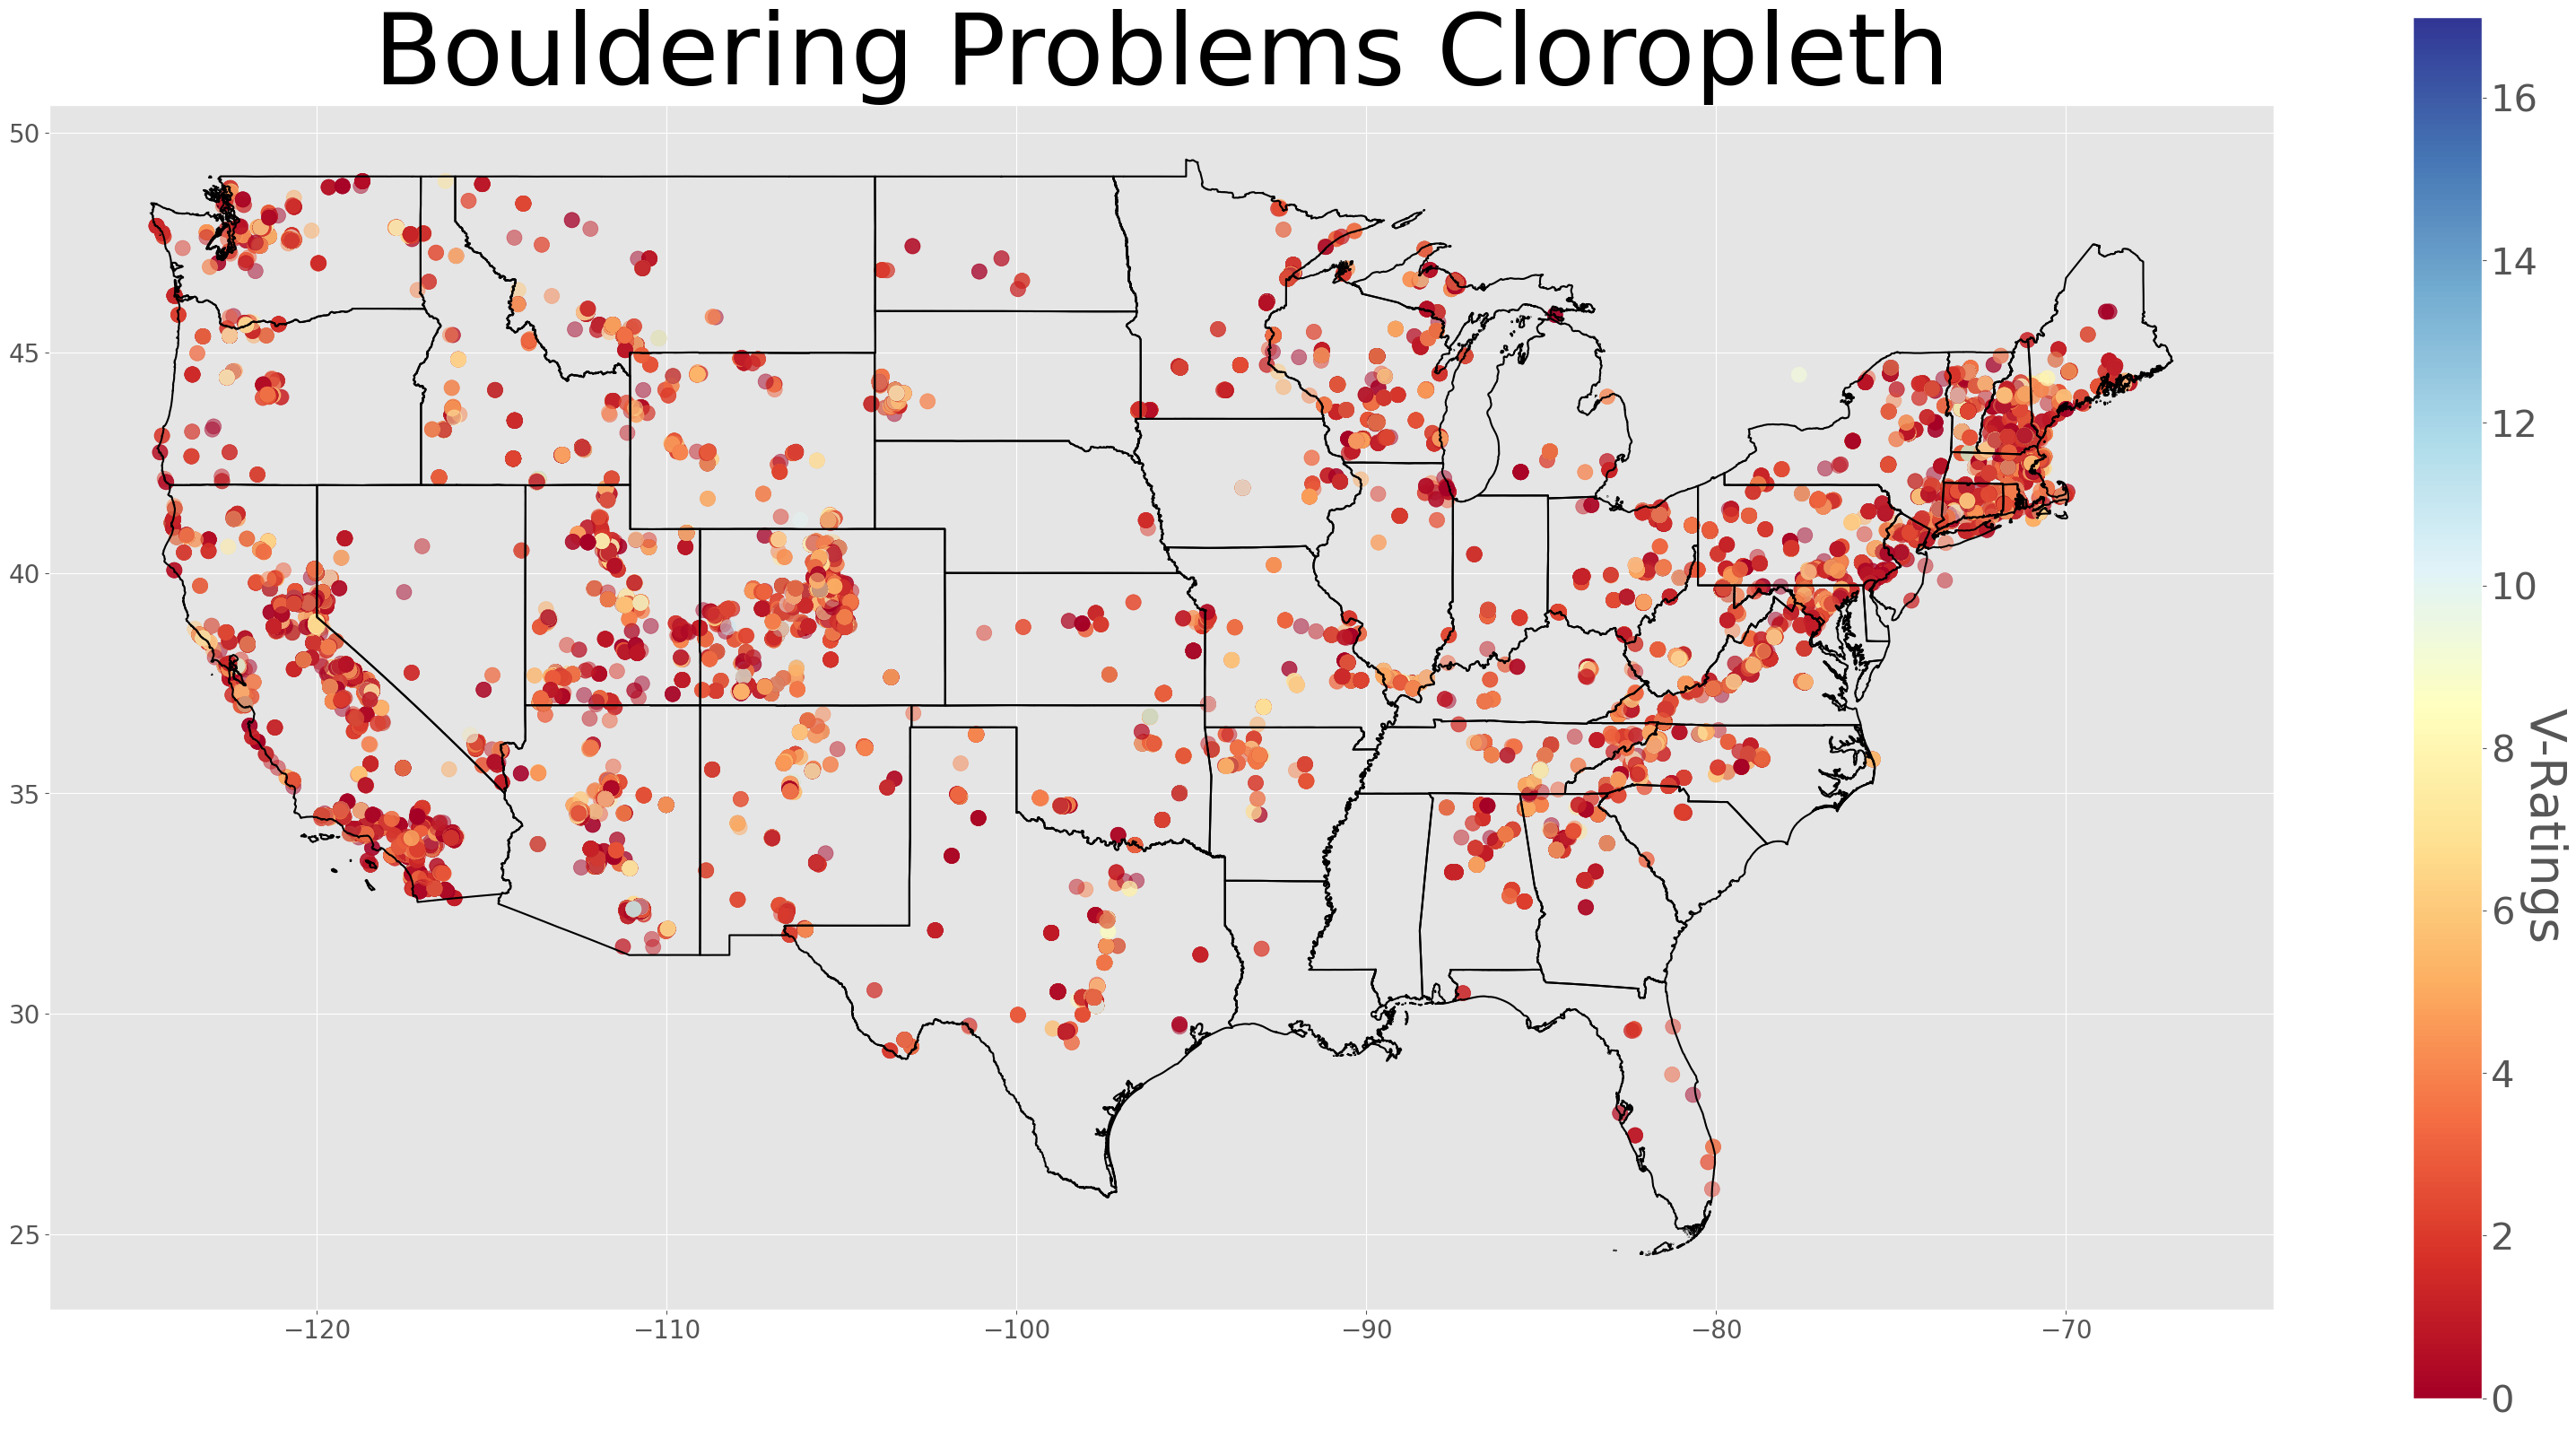

In [19]:
base = usdf.boundary.plot(edgecolor= "black", figsize=(40, 40))
ax = boulders.plot(ax = base, column = boulders["numeric_grades"], markersize = 150, cmap = "RdYlBu", alpha=0.5, legend = True,  legend_kwds={'shrink':0.5})
base.set_title("Bouldering Problems Cloropleth", fontsize = 80)
base.figure.axes[0].tick_params(labelsize=20)
base.figure.axes[1].tick_params(labelsize=30)
base.figure.axes[1].set_ylabel('V-Ratings', fontsize = 40, rotation=-90, rotation_mode = 'default')
plt.show()

In [20]:
#using geoplot KDF for density plot
import numpy
print(numpy.__version__)

import geoplot as gplt

1.26.4


/home/marcel/anaconda3/lib/python3.9/site-packages/geoplot/geoplot.py:1310: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/marcel/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcel/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


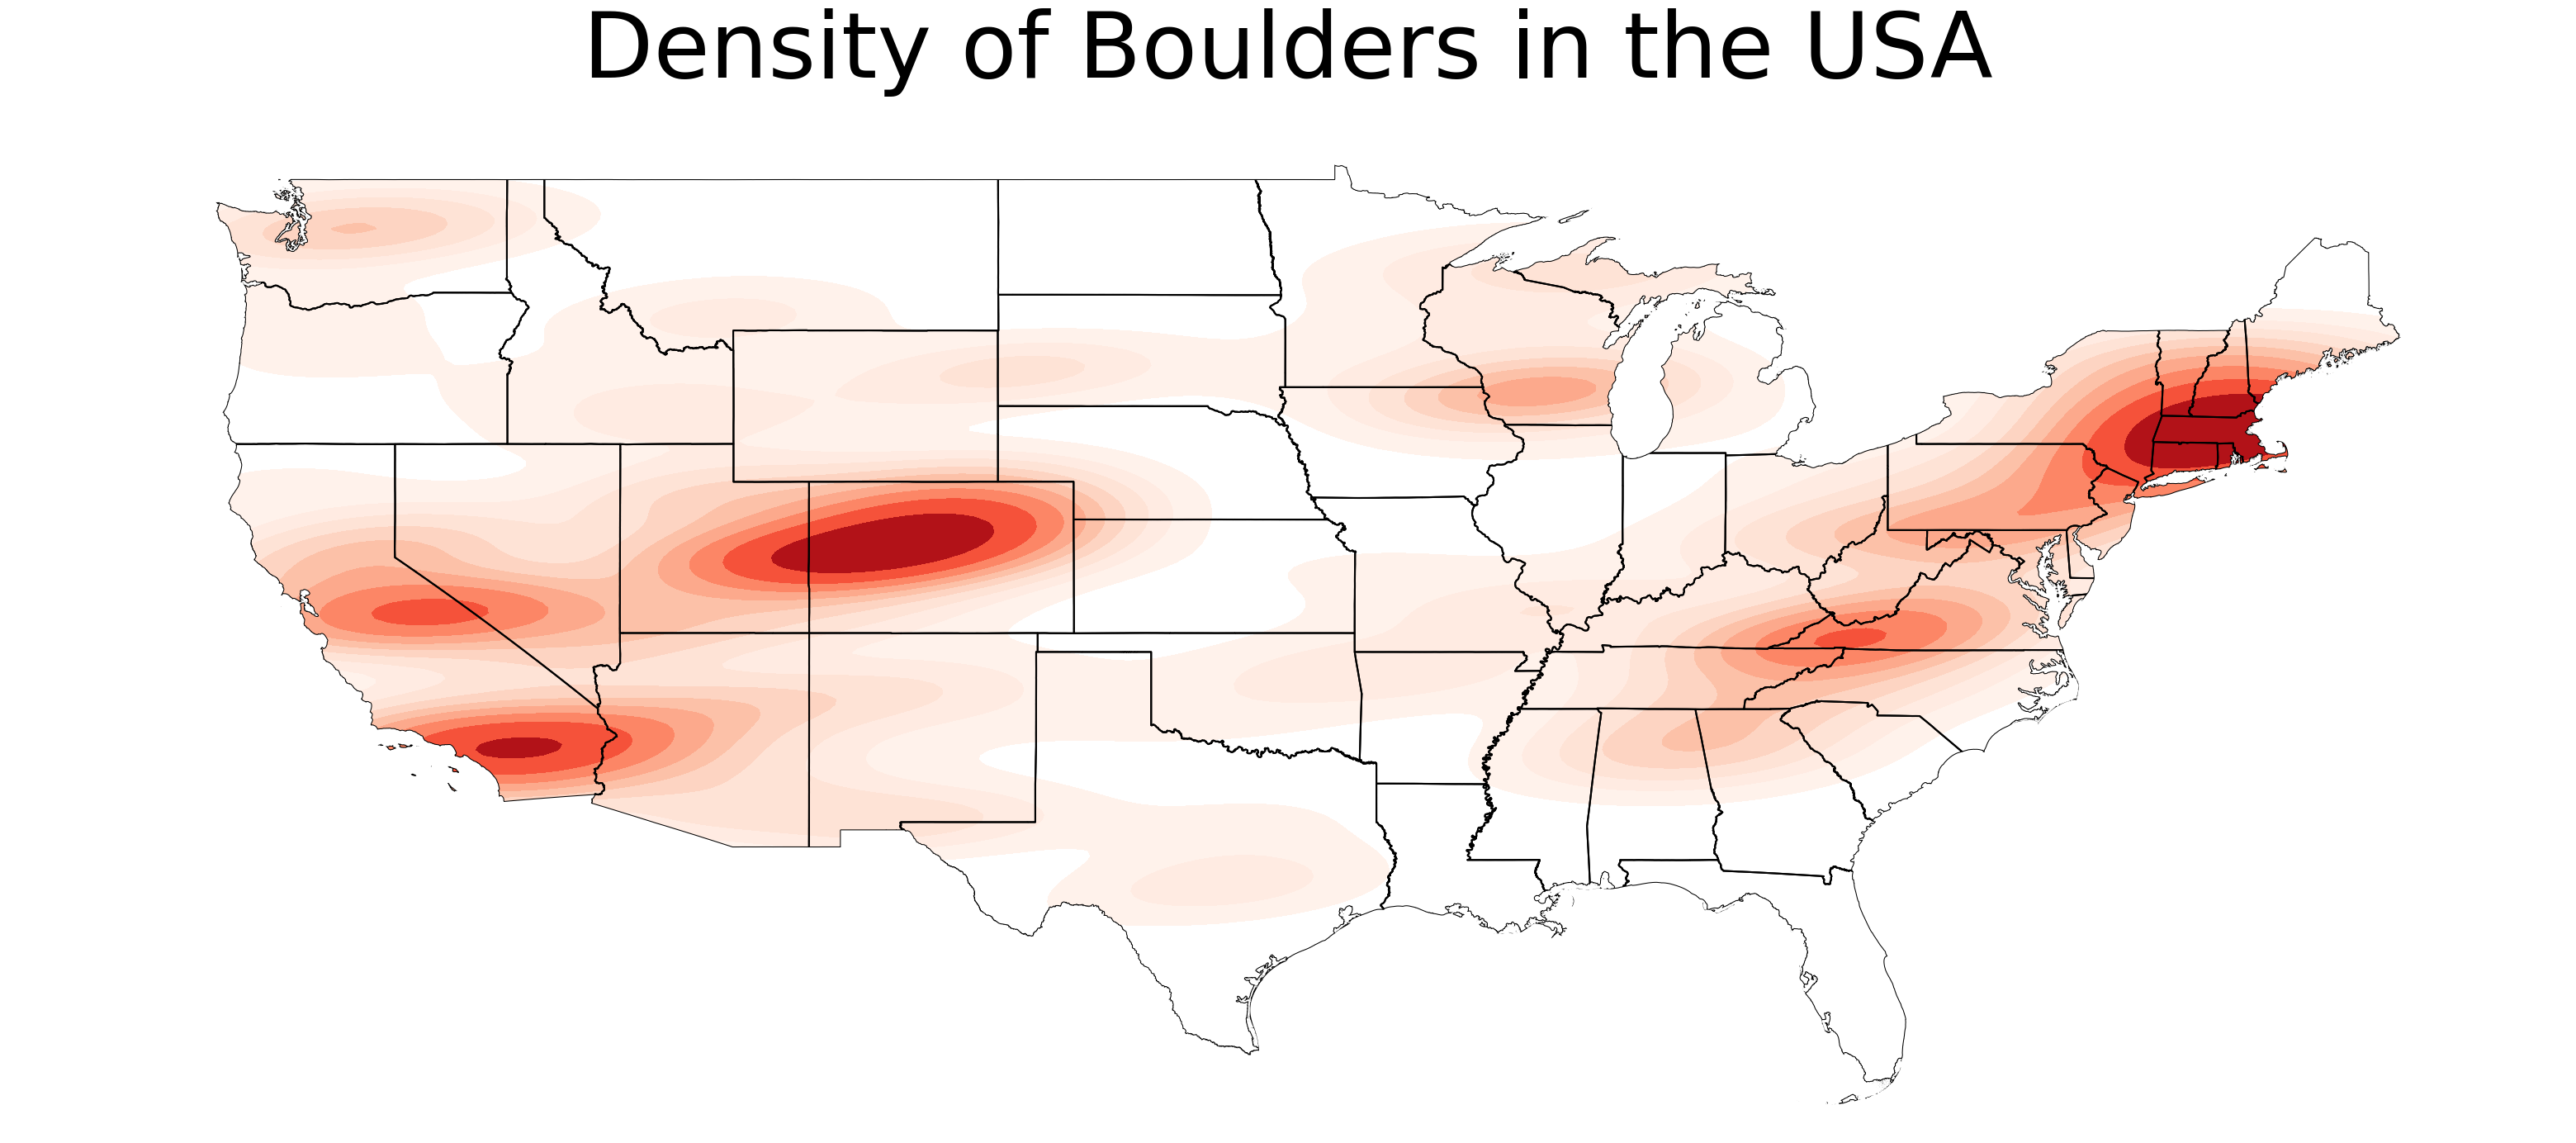

In [21]:
base = usdf.boundary.plot(edgecolor= "black", figsize=(40, 40))
gplt.kdeplot(boulders,cmap='Reds',fill=True, ax=base, clip = usdf)
base.set_title("Density of Boulders in the USA", fontsize = 80)
plt.show()

## Figure out how to separate by State

In [22]:
#separated by state but takes forever to run since 0(n^2), saved as a file for future use, I cannot save the full df as a
#geojson or shp file because the file type cannot take lists, so we can just load and join together.
#Possibly make a relational database with some data in a regular json file and the geometry data in the geojson file.
for i in range(0, len(geo_df)-1):
    for j in range(0,len(usdf)-1):
        if usdf.iloc[j]["geometry"].contains(geo_df.iloc[i]["geometry"]):
            geo_df.at[i, "state"] = usdf.iloc[j]["STUSPS"]
            break
#write to json file
pd.DataFrame(geo_df).to_json("climbdata.json", default_handler = str)

KeyboardInterrupt: 

In [23]:
#now this is all we need to get in the data, pre-cleaned
y = pd.read_json("climbdata.json")
y_geo = gpd.GeoDataFrame(y, crs="EPSG:4326", geometry=geometry)

In [24]:
y_geo

route_name  \
0                  Wheres Waldo?   
1                        Unknown   
2                 Vanished Edens   
3             Stairway to Heaven   
4       Shagadelic Humper Bumper   
...                          ...   
183248         State of Delusion   
183249          Pistachio Pillar   
183250              Halcyon Daze   
183251                  Commited   
183252              420 Moderate   

                                                    grade safety  \
0                             {'YDS': 'V2', 'Font': '5+'}          
1                                                      {}          
2                             {'YDS': 'V4', 'Font': '6B'}          
3       {'YDS': '5.7', 'French': '5a', 'Ewbanks': '15'...          
4       {'YDS': '5.8', 'French': '5b', 'Ewbanks': '16'...          
...                                                   ...    ...   
183248  {'YDS': '5.10b', 'French': '6a+', 'Ewbanks': '...          
183249  {'YDS': '5.10c', 'French': '6b', 'Ewbanks': '2...          
183250  {'YDS': '5.11d', 'French': '7a', 'Ewbanks': '2...          
183251  {'YDS': '5.11c', 'French': '6c+', 'Ewbanks': '...          
183252                        {'YDS': 'V2', 'Font': '5+'}          

                                 type                               fa  \
0                   {'boulder': True}                          unknown   
1           {'tr': True, 'ice': True}                           Unkown   
2                   {'boulder': True}                Joe Feldman, 2019   
3          {'trad': True, 'tr': True}                          unknown   
4                        {'tr': True}                          unknown   
...                               ...                              ...   
183248  {'trad': True, 'sport': True}       Ron Cotman, Gordon Briordy   
183249                {'sport': True}                  Ron Cotman 2003   
183250                {'sport': True}  Alec Gibbons, Brian Behle, 2005   
183251                 {'trad': True}      Tony Bentley and Ron Cotman   
183252              {'boulder': True}                          unknown   

                                              description  \
0       [Sit Start on the crack. Pull a big move to a ...   
1       [Just a general entry for the routes. Usually ...   
2       [Start right hand in a sidepull slot and left ...   
3       [Climb the large flake right of Slot Machine t...   
4                 [Climb the buttress left of Cake Walk.]   
...                                                   ...   
183248  [Start on the thin seam climbers left of Halcy...   
183249  [A tricky route following the green streak up ...   
183250  [A very long sport route with multiple roof pu...   
183251  [The obvious sweeping corner on the wall. Basi...   
183252  [This is the historically chipped line on the ...   

                                                 location  \
0                                                           
1       [Can't miss the silo with a giant sheet of ice...   
2                                   [Hot Stuff Camp Roof]   
3                                                           
4                                                           
...                                                   ...   
183248  [Starts on the thin seam in between Halcyon an...   
183249                           [Center of The Nuthouse]   
183250  [Right where the trail comes into The Nuthouse...   
183251  [Uphill from Halcyon Daze on the far left side...   
183252          [On the up hill side of the 420 boulder.]   

                                            protection  \
0                                               [Pads]   
1       [No gear needed. All supplied and is Top Rope]   
2                                 [pad - good landing]   
3                             [SR, tricams are handy.]   
4           [Build a TR anchor on off of trees above.]   
...                                                ...   
183248     